In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.3)

In [2]:
import itertools as it
from collections import Counter, defaultdict, deque

In [3]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import ri2py
%load_ext rpy2.ipython

In [13]:
from glob import glob
def load_data():
    return pd.concat(map(pd.read_pickle, glob('results/discrete_*')))
    
df = load_data()
df['rate'] = df.util / df.depth

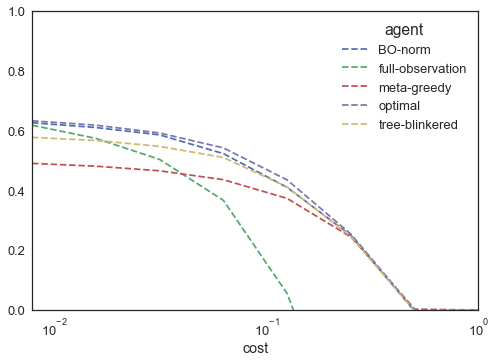

In [12]:
def plot_cost(df):
    df.groupby('cost agent'.split()).rate.mean().unstack().plot(logx=True, ls='--', alpha=1)
    plt.ylim(0,1)
    
plot_cost(df.query('depth == 3'))

In [104]:
df.to_csv('results/discrete_tree.csv')

In [19]:
from statsmodels.stats.weightstats import ttest_ind
df1 = df.query('depth <= 3')
dd = df1.set_index('agent')
dd['rate'] = dd.util / dd.depth
for a in dd.index.unique():
    max_depth = dd.loc[a].depth.max()
    mrl = dd.loc['BO-norm'].query("depth <= @max_depth").rate
    stat, p, d = ttest_ind(mrl, dd.loc[a].rate)
    print("{}  {:.3f}  t({}) = {:.2f} p < {:.2f}"
          .format(a, dd.loc[a].rate.mean(), int(d), stat, p))

full-observation  -0.332  t(159998) = 138.54 p < 0.00
meta-greedy  0.310  t(159998) = 28.83 p < 0.00
BO-norm  0.367  t(159998) = 0.00 p < 1.00
optimal  0.373  t(159998) = -2.87 p < 0.00
tree-blinkered  0.335  t(159998) = 15.76 p < 0.00


In [20]:
df2 = df.query('agent != "optimal"')
# df1.groupby('agent').apply(len)
# df2 = df.query('depth >= 4')
# df1.groupby('agent').apply(len)

In [102]:
%%R -i df2
library(car)
mod = lm('util ~ agent * factor(depth) * factor(cost)', data=df2)
Anova(mod)

Anova Table (Type II tests)

Response: util
                                   Sum Sq     Df F value    Pr(>F)    
agent                            16580775      3 4625010 < 2.2e-16 ***
factor(depth)                     3426542      4  716845 < 2.2e-16 ***
factor(cost)                     16186899      7 1935061 < 2.2e-16 ***
agent:factor(depth)              15920078     12 1110179 < 2.2e-16 ***
agent:factor(cost)               31785090     21 1266582 < 2.2e-16 ***
factor(depth):factor(cost)       11387885     28  340341 < 2.2e-16 ***
agent:factor(depth):factor(cost) 28574753     84  284664 < 2.2e-16 ***
Residuals                          955815 799840                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [21]:
dd = df2.set_index('agent')
dd['rate'] = dd.util / dd.depth
for a in dd.index.unique():
    stat, p, d = ttest_ind(dd.loc['BO-norm'].rate, dd.loc[a].rate)
    print("{}  {:.3f}  t({}) = {:.2f} p < {}"
          .format(a, dd.loc[a].rate.mean(), int(d), stat, p))

full-observation  -1.740  t(399998) = 231.18 p < 0.0
meta-greedy  0.307  t(399998) = 72.84 p < 0.0
BO-norm  0.392  t(399998) = 0.00 p < 1.0
tree-blinkered  0.368  t(399998) = 20.77 p < 9.195208046767866e-96


In [62]:
ttest_ind(
    df.query('depth < 4 and agent == "BO-norm"').util,
    df.query('depth < 4 and agent == "optimal"').util
)

(-2.280259638433261, 0.022593790447203436, 139998.0)

In [59]:
%%R 
length(filter(df, agent='BO.norm'))



Error in filter(df, agent = "BO.norm") : 
  unused argument (agent = "BO.norm")


/usr/local/lib/miniconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in filter(df, agent = "BO.norm") : 
  unused argument (agent = "BO.norm")

  warnings.warn(x, RRuntimeWarning)


In [53]:
%%R
attach(util)
t.test(BO.norm)

          BO.norm full.observation meta.greedy    optimal tree.blinkered
0             NaN              NaN   0.9843750        NaN            NaN
1             NaN              NaN   0.9843750        NaN            NaN
2             NaN              NaN   0.9843750        NaN            NaN
3             NaN              NaN  -0.0156250        NaN            NaN
4             NaN              NaN   0.9843750        NaN            NaN
5             NaN              NaN  -0.0156250        NaN            NaN
6             NaN              NaN  -0.0156250        NaN            NaN
7             NaN              NaN   0.9843750        NaN            NaN
8             NaN              NaN   0.9843750        NaN            NaN
9             NaN              NaN   0.9843750        NaN            NaN
10            NaN              NaN  -0.0156250        NaN            NaN
11            NaN              NaN  -0.0156250        NaN            NaN
12            NaN              NaN   0.9843750     